In [2]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv

--2020-11-11 18:53:35--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519 [text/plain]
Saving to: ‘shampoo.csv’

shampoo.csv         100%[===================>]     519  --.-KB/s    in 0s      

2020-11-11 18:53:36 (27.5 MB/s) - ‘shampoo.csv’ saved [519/519]



In [3]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

--2020-11-11 18:54:09--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.76.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.76.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2020-11-11 18:54:10 (20.0 MB/s) - ‘airline-passengers.csv’ saved [2180/2180]



In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler

In [15]:
training_set = pd.read_csv('airline-passengers.csv')
training_set.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [16]:
training_set = training_set.iloc[:, 1:2].values
training_set[0:2]

array([[112],
       [118]])

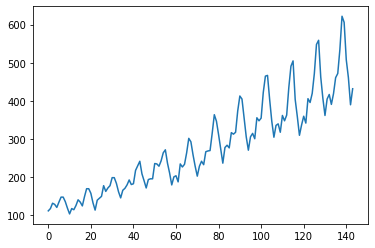

In [17]:
plt.plot(training_set, label = "Shampoo Sales Data")
plt.show()

In [18]:
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x), np.array(y)

In [21]:
sliding_windows(np.arange(0, 10, 1), 3)

(array([[0, 1, 2],
        [1, 2, 3],
        [2, 3, 4],
        [3, 4, 5],
        [4, 5, 6],
        [5, 6, 7]]),
 array([3, 4, 5, 6, 7, 8]))

In [22]:
sc = StandardScaler()
traing_data = sc.fit_transform(training_set)
traing_data[:2]

array([[-1.40777884],
       [-1.35759023]])

In [23]:
sc.inverse_transform(traing_data[:2])

array([[112.],
       [118.]])

In [48]:
seq_length = 4
x, y = sliding_windows(traing_data, seq_length)
x.shape, y.shape

((139, 4, 1), (139, 1))

In [49]:
train_size = int(len(y)*0.67)
test_size = len(y) - train_size

In [50]:
dataX = torch.Tensor(np.array(x))
dataY = torch.Tensor(np.array(y))

trainX = torch.Tensor(np.array(x[0:train_size]))
trainY = torch.Tensor(np.array(y[0:train_size]))

testX = torch.Tensor(np.array(x[train_size:len(x)]))
testY = torch.Tensor(np.array(y[train_size:len(y)]))

In [52]:
dataX.shape, dataY.shape

(torch.Size([139, 4, 1]), torch.Size([139, 1]))

In [53]:
from model.lstm import LSTM


In [55]:
num_epoches = 2000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1

num_classes = 1

lstm = LSTM(num_classes=num_classes, input_size=input_size, hidden_size=hidden_size, num_layers=num_layers)

criterion = torch.nn.MSELoss()    
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

lstm.train()

for epoch in range(num_epoches):
    outputs = lstm(trainX)
    optimizer.zero_grad()

    loss = criterion(outputs, trainY)
    
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))



Epoch: 0, loss: 1.71344
Epoch: 100, loss: 0.12339
Epoch: 200, loss: 0.04756
Epoch: 300, loss: 0.03309
Epoch: 400, loss: 0.03217
Epoch: 500, loss: 0.03160
Epoch: 600, loss: 0.03121
Epoch: 700, loss: 0.03089
Epoch: 800, loss: 0.03059
Epoch: 900, loss: 0.03018
Epoch: 1000, loss: 0.02871
Epoch: 1100, loss: 0.02486
Epoch: 1200, loss: 0.02100
Epoch: 1300, loss: 0.01974
Epoch: 1400, loss: 0.01914
Epoch: 1500, loss: 0.01874
Epoch: 1600, loss: 0.01845
Epoch: 1700, loss: 0.01825
Epoch: 1800, loss: 0.01811
Epoch: 1900, loss: 0.01800


In [56]:
lstm.eval()

train_predict = lstm(dataX)
train_predict

tensor([[-1.2330],
        [-1.2616],
        [-1.2121],
        [-1.1046],
        [-1.1480],
        [-1.1879],
        [-1.2379],
        [-1.2888],
        [-1.2992],
        [-1.2949],
        [-1.2716],
        [-1.1638],
        [-1.2068],
        [-1.2390],
        [-1.1063],
        [-0.9276],
        [-0.9991],
        [-1.0405],
        [-1.1374],
        [-1.2336],
        [-1.1862],
        [-1.1203],
        [-1.1329],
        [-0.8462],
        [-0.9981],
        [-0.8693],
        [-0.8919],
        [-0.5858],
        [-0.7213],
        [-0.7395],
        [-0.8748],
        [-1.0312],
        [-0.9342],
        [-0.9820],
        [-0.8686],
        [-0.7152],
        [-0.8609],
        [-0.7420],
        [-0.3587],
        [-0.4295],
        [-0.4715],
        [-0.6226],
        [-0.7472],
        [-0.7976],
        [-0.6827],
        [-0.7305],
        [-0.5950],
        [-0.2123],
        [-0.3365],
        [-0.3590],
        [-0.1221],
        [-0.0265],
        [-0.

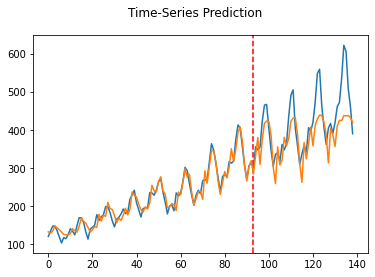

In [57]:
data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction')
plt.show()

In [60]:
testX.shape, testY.shape

(torch.Size([46, 4, 1]), torch.Size([46, 1]))

In [62]:
test_predict = lstm(testX)
data_predict = test_predict.data.numpy()
dataY_plot = testY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

data_predict.shape, dataY_plot.shape

((46, 1), (46, 1))

In [ ]:
plt.plot(np)